# Poke Dataset Using Logistics Regression

# Brief Description

In poke dataset,I figured out the outcome either legendary or not that is based on binary classification problem.Hence ,I used logistic regression algorithm describing the relationship between the dependent binary variable and one or more independent variable/s.In descriptive analysis ,describe function in python to summarize and checking for the missing values and outliers in this dataset.Standard deviation mehtod is used to identify the outlier and missing values to replace with mean values . In univariate analysis ,box plot and histogram to show the corresponding each variable .A relationship between two variables to check the correlation using heat map in bivariate analysis.Standard scaler in sklearn library refers to the transformations applied to my data before feeding it to the algorithm.k-fold cross validation method to perform training data set before modeling part and  then fitting the model with train and test data sets.Finally , I have used for confusion matrix to get the performance measurement for binary classification problem.

# Data Understanding 

Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Read the Data Using Pandas
df=pd.read_csv('Poke.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,2,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,3,Venusaur,Grass,Poison,525.0,80,82,83,NaN,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,4,Charmander,Fire,NaN,309.0,39,52,43,60.0,50,65,1,False


In [3]:
#Dataset shape
df.shape

(800, 13)

Here data set has 800 rows and 13 columns.

In [4]:
# Dataset Summary
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,755.000000,800.000000,800.000000,800.000000,692.000000,800.000000,800.000000,800.00000
mean,362.813750,436.517881,69.258750,79.001250,73.842500,72.452312,71.902500,68.277500,3.32375
std,208.343798,120.245408,25.534669,32.457366,31.183501,31.967137,27.828916,29.060474,1.66129
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.00000
50%,364.500000,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,516.500000,80.000000,100.000000,90.000000,94.000000,90.000000,90.000000,5.00000
max,721.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


After summarizing the dataset ,maximum and third quartile (75%) values are slightly difference in (HP,Attack,Defense, Sp.Atk, Sp.Def , Speed) columns.

In [5]:
# Identify Outliers using Standard Deviation
missing_col = df[['Sp. Atk']]
mean = df[['Sp. Atk']].mean()
t = missing_col.fillna(mean)
u = round(t)
u.head()

,Sp. Atk
0,65.0
1,80.0
2,72.0
3,122.0
4,60.0


In [6]:
df['Sp. Atk'] = u

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,2,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,3,Venusaur,Grass,Poison,525.0,80,82,83,72.0,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,4,Charmander,Fire,NaN,309.0,39,52,43,60.0,50,65,1,False


In [8]:
# Data types of each column in Dataset
df.dtypes

#               int64
Name           object
Type 1         object
Type 2         object
Total         float64
HP              int64
Attack          int64
Defense         int64
Sp. Atk       float64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
dtype: object

In this dataset, (name,type1 and type2) columns are categorical variables and the remaining columns are numeric variables 

In [9]:
# Delete the ‘Id’ column
del df['#']

After deleting # column , it has only 12 columns

In [10]:
# Set ‘Name’ column as index variable
df['Name'].index

RangeIndex(start=0, stop=800, step=1)

In [11]:
# Group the Data according to column ‘Name’ using Pivot table/crosstab/group by commands
df.pivot_table(df,index= ['Type 1','Type 2','Name'])   # 'Name' column using pivot table

Attack  Defense  Generation   HP  \
Type 1 Type 2   Name                                                        
Bug    Electric Galvantula                   77       60           5   70   
                Joltik                       47       50           5   50   
       Fighting Heracross                   125       75           2   80   
                HeracrossMega Heracross     185      115           2   80   
       Fire     Larvesta                     85       55           5   55   
                Volcarona                    60       65           5   85   
       Flying   Beautifly                    70       50           3   60   
                Butterfree                   45       50           1   60   
                Combee                       30       42           4   30   
                Ledian                       35       50           2   55   
                Ledyba                       20       30           2   40   
                Masquerain                   60       62           3   70   
                Mothim                       94       50           4   70   
                Ninjask                      90       45           3   61   
                PinsirMega Pinsir           155      120           1   65   
                Scyther                     110       80           1   70   
                Vespiquen                    80      102           4   70   
                Vivillon                     52       50           6   80   
                Yanma                        65       45           2   65   
                Yanmega                      76       86           4   86   
       Ghost    Shedinja                     90       45           3    1   
       Grass    Leavanny                    103       80           5   75   
                Paras                        70       55           1   35   
                Parasect                     95       80           1   60   
                Sewaddle                     53       70           5   45   
                Swadloon                     63       90           5   55   
                WormadamPlant Cloak          59       85           4   60   
       Ground   Nincada                      45       90           3   31   
                WormadamSandy Cloak          79      105           4   60   
       Poison   Ariados                      90       70           2   70   
...                                         ...      ...         ...  ...   
Water  Ghost    Jellicent                    60       70           5  100   
       Grass    Lombre                       50       50           3   60   
                Lotad                        30       30           3   40   
                Ludicolo                     70       70           3   80   
       Ground   Barboach                     48       43           3   50   
                Gastrodon                    83       68           4  111   
                Marshtomp                    85       70           3   70   
                Palpitoad                    65       55           5   75   
                Quagsire                     85       85           2   95   
                Seismitoad                   95       75           5  105   
                Swampert                    110       90           3  100   
                SwampertMega Swampert       150      110           3  100   
                Whiscash                     78       73           3  110   
                Wooper                       45       45           2   55   
       Ice      Cloyster                     95      180           1   50   
                Dewgong                      70       80           1   90   
                Lapras                       85       80           1  130   
       Poison   Qwilfish                     95       75           2   65   
                Tentacool                    40       35           1   40   
                Tentacruel           

In [12]:
# Check for max ‘Hp’ for a Pokémon along with ‘Name’
df[df['HP'] == df['HP'].max()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540.0,255,10,10,75.0,135,55,2,False


In [13]:
# Check for min ‘Hp’ for a Pokémon along with ‘Name’
df[df['HP'] == df['HP'].min()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,Shedinja,Bug,Ghost,236.0,1,90,45,30.0,30,40,3,False


Change the ‘Name’,’Type1’, & ‘Type2’ column type to Category

In [14]:
cat = df.astype({"Name":'category',"Type 1":'category',"Type 2":'category'})
cat.dtypes

Name          category
Type 1        category
Type 2        category
Total          float64
HP               int64
Attack           int64
Defense          int64
Sp. Atk        float64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
dtype: object

# Check for Missing Values in Dataset

In [16]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total          45
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Replace with my name instead of missing value in Type 2 column and again substitutes mean value instead of missing value in total column.

In [17]:
df["Type 2"].fillna("Than Than Swe", inplace = True)

In [18]:
missing_col1 = df[['Total']]
mean = df[['Total']].mean()
d = missing_col1.fillna(mean)
v=round(d)

In [19]:
df['Total']=v

In [20]:
missing_col1 = df[['Sp. Atk']]
mean = df[['Sp. Atk']].mean()
d = missing_col1.fillna(mean)
v=round(d)

In [21]:
df['Sp. Atk']=v

# Visualizations

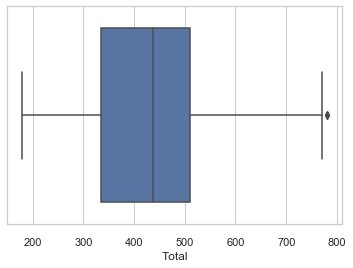

In [22]:
#Distribution of numerical variable using box plot
import seaborn as sns
df_numeric=df.select_dtypes(exclude=['object','bool'])
#Box plot using (Total) numerical variables
sns.set(style="whitegrid")
sns.boxplot(df_numeric['Total']) 

Using scatter plot to understand the relationship between two variables

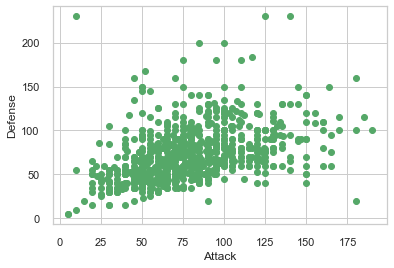

In [23]:
x=df_numeric['Attack']
y=df_numeric['Defense']
plt.scatter(x, y, marker='o', color='g')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

In [24]:
# Define a function along with loops to compare different stats between two
def compare_stats(df):
    for i in df:
        X= np.mean(i)
        Y=np.median(df)
    print(X,Y)

compare_stats(df['Defense'])

120.0 70.0


Calculate correlation to descirbe the relationship between two numeric features

In [25]:
correlations = df_numeric.corr()

In [26]:
correlations

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.603837,0.718027,0.593395,0.679659,0.696793,0.565036,0.042488
HP,0.603837,1.000000,0.422386,0.239622,0.327481,0.378718,0.175952,0.058683
Attack,0.718027,0.422386,1.000000,0.438687,0.343736,0.263990,0.381240,0.051451
Defense,0.593395,0.239622,0.438687,1.000000,0.212104,0.510747,0.015227,0.042419
Sp. Atk,0.679659,0.327481,0.343736,0.212104,1.000000,0.468155,0.432409,0.012561
Sp. Def,0.696793,0.378718,0.263990,0.510747,0.468155,1.000000,0.259133,0.028486
Speed,0.565036,0.175952,0.381240,0.015227,0.432409,0.259133,1.000000,-0.023121
Generation,0.042488,0.058683,0.051451,0.042419,0.012561,0.028486,-0.023121,1.000000


Plot heatmap of annotated correlations

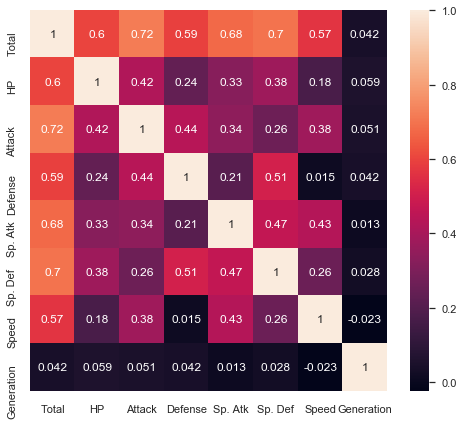

In [27]:
plt.figure(figsize=(8, 7))
correlations = correlations 
sns.heatmap(correlations, annot=True,)

Right now ,there's no strong correlation between any two variables.

# 3. Data Preparation

Find the outliers & treat them

In [28]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,436.545000,69.258750,79.001250,73.842500,72.391250,71.902500,68.277500,3.32375
std,116.810258,25.534669,32.457366,31.183501,29.728655,27.828916,29.060474,1.66129
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,335.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.00000
50%,437.000000,65.000000,75.000000,70.000000,72.000000,70.000000,65.000000,3.00000
75%,510.000000,80.000000,100.000000,90.000000,87.750000,90.000000,90.000000,5.00000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In describe function , HP,Attack,Defense,Sp.Def,Speed columns might have some outliers because
mean, quartlies value are smaller than the max value

# Outlier Treatment

Using Percentile Values to treat an outlier

In [29]:
#Using LTV&HTV
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LTV,LTV)
        df[i]=df[i].mask(df[i]>UTV,UTV)
    return df

In [30]:
out=outlier_detect(df)

In [31]:
out

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49.0,49,65.000,65,45.0,1,False
1,Ivysaur,Grass,Poison,405.0,60,62.0,63,80.000,80,60.0,1,False
2,Venusaur,Grass,Poison,525.0,80,82.0,83,72.000,100,80.0,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100.0,123,122.000,120,80.0,1,False
4,Charmander,Fire,Than Than Swe,309.0,39,52.0,43,60.000,50,65.0,1,False
5,Charmeleon,Fire,Than Than Swe,405.0,58,64.0,58,80.000,65,80.0,1,False
6,Charizard,Fire,Flying,534.0,78,84.0,78,72.000,85,100.0,1,False
7,CharizardMega Charizard X,Fire,Dragon,634.0,78,130.0,111,130.000,85,100.0,1,False
8,CharizardMega Charizard Y,Fire,Flying,634.0,78,104.0,78,144.375,115,100.0,1,False
9,Squirtle,Water,Than Than Swe,314.0,44,48.0,65,50.000,64,43.0,1,False


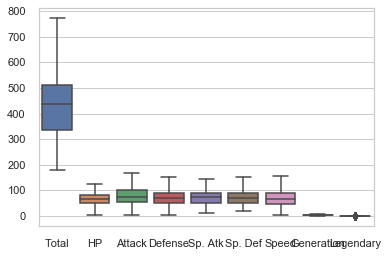

In [32]:
sns.boxplot(data = df)

In boxplot figure shows no outlier .

In [33]:
correlations = df.corr()

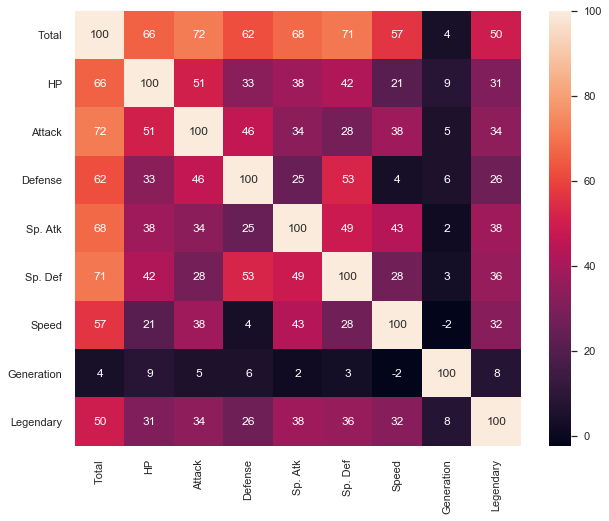

In [34]:
plt.figure(figsize=(10,8))
correlations = correlations * 100
sns.heatmap(correlations,annot = True,fmt = '.0f')

To show , Box plot for each Variable in data visualization.

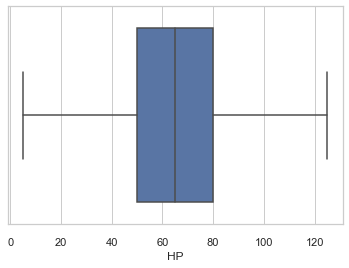

In [35]:
sns.boxplot(df['HP'])

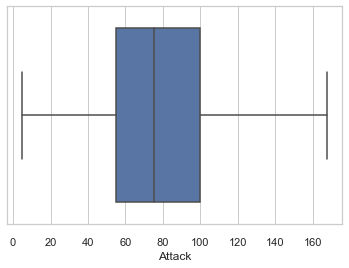

In [36]:
sns.boxplot(df['Attack'])

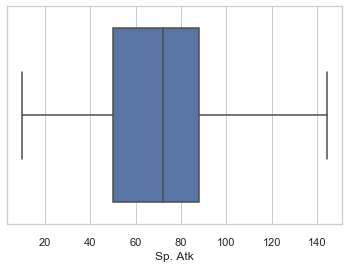

In [37]:
sns.boxplot(df['Sp. Atk'])

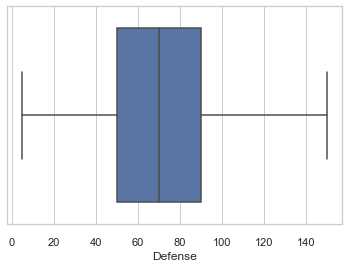

In [38]:
sns.boxplot(df['Defense'])

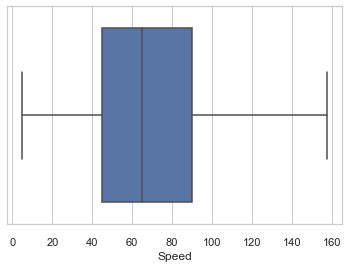

In [39]:
sns.boxplot(df['Speed'])

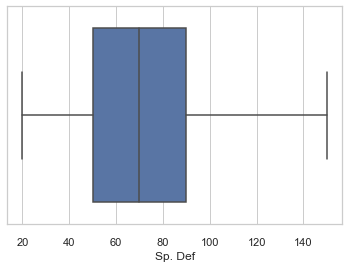

In [40]:
sns.boxplot(df['Sp. Def'])

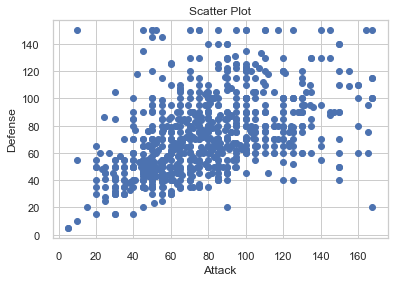

In [41]:
plt.scatter(df['Attack'],df['Defense'])
plt.title('Scatter Plot')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

To understand the relationship between defense and attack columns using scatter plot

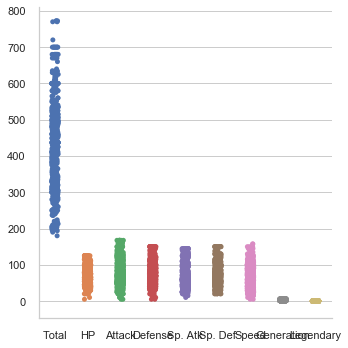

In [42]:
##Plot some Categorical plots using sea born
sns.catplot(data = df )

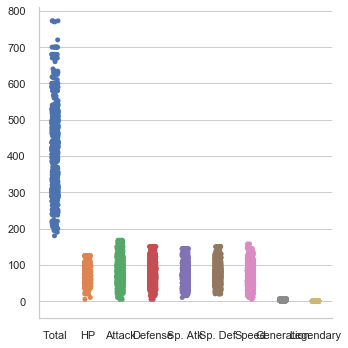

In [43]:
##Plot some Categorical plots using sea born
sns.catplot(data = df )

Applying standard scaler function to re-scale a feature value 

In [44]:
scaler = StandardScaler()
print(scaler.fit(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [45]:
print(scaler.transform(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]))

[[-1.04099298e+00 -9.30560370e-01 -8.36333994e-01 -2.45059335e-01
  -2.47914457e-01 -8.03393977e-01]
 [-3.76882626e-01 -5.25943532e-01 -3.52554388e-01  2.80325814e-01
   3.07117909e-01 -2.84991669e-01]
 [ 5.08597847e-01  9.65439120e-02  3.38559335e-01  1.20400763e-04
   1.04716106e+00  4.06211409e-01]
 ...
 [ 5.08597847e-01  9.68026333e-01 -4.56221446e-01  2.53510374e+00
   2.15722580e+00  6.06098699e-02]
 [ 5.08597847e-01  2.52424494e+00 -4.56221446e-01  1.20400763e-04
   2.15722580e+00  4.06211409e-01]
 [ 5.08597847e-01  9.68026333e-01  1.61711972e+00  2.03160964e+00
   6.77139487e-01  6.06098699e-02]]


In [46]:
pp.ProfileReport(df)

Comparing two different names in name column , show them using barplot

In [47]:
def comp_pok(name1,name2,param):
    a = df[(df.Name == name1) | (df.Name == name2)]
    sns.barplot(x='Name',y=param,data=a)

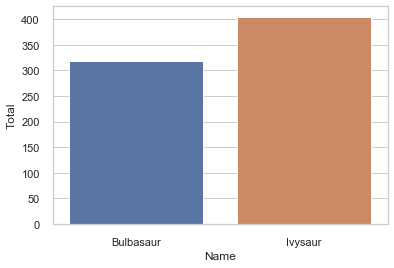

In [48]:
comp_pok('Bulbasaur','Ivysaur','Total')

In [49]:
# Separate the input & output from  Data into X and Y
X = df.iloc[:, [3,4,5,6,7,8,9,10]]
y = df.iloc[:, 11]

Divide the data as train & test using train test split with test as 0.25 size

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7)
model = LogisticRegression()
# Fit the train data in the model
model.fit(X_train, Y_train)
accuary_score = model.score(X_test, Y_test)

In [51]:
accuary_score

0.925

Try k-fold cross validation on the training with respective model

In [52]:
# Initialize parameters
num_folds = 2
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model1 = LogisticRegression()

In [53]:
# Fitting the model and Extracting the results
results1 = cross_val_score(model1, X, y, cv=kfold)

In [54]:
results1

array([0.5875, 0.865 ])

In [55]:
# Predict the output for test 
y_pred = model.predict(X_test)

Check for training set accuracy, precision, recall

In [56]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       181
        True       1.00      0.21      0.35        19

    accuracy                           0.93       200
   macro avg       0.96      0.61      0.65       200
weighted avg       0.93      0.93      0.90       200



In [57]:
# Compare actual and predicted results of test data
report = classification_report(Y_test, y_pred)

In [58]:
print(report)

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       181
        True       1.00      0.21      0.35        19

    accuracy                           0.93       200
   macro avg       0.96      0.61      0.65       200
weighted avg       0.93      0.93      0.90       200



In [59]:
# Classification --- Confusion Matrix & Accuracy Score
confusion_matrix(Y_test,y_pred)

array([[181,   0],
       [ 15,   4]])

In [60]:
################# Classification Accuracy #################
matrix2 = accuracy_score(Y_test, y_pred)*100
print(matrix2)

92.5
